# 8.1 Sequence Models
Imagine that you are watching movies on Netflix. As a good Netflix user, you decide to rate each
of the movies religiously. After all, a good movie is a good movie, and you want to watch more of
them, right? As it turns out, things are not quite so simple. Peopleʼs opinions on movies can change
quite significantly over time. In fact, psychologists even have names for some of the effects:

* There is anchoring, based on someone elseʼs opinion. For instance, after the Oscar awards, ratings for the corresponding movie go up, even though it is still the same movie. This effect persists for a few months until the award is forgotten. It has been shown that the effect lifts rating by over half a point (Wu et al., 2017).

* There is the hedonic adaptation, where humans quickly adapt to accept an improved or a worsened situation as the new normal. For instance, after watching many good movies, the expectations that the next movie is equally good or better are high. Hence, even an average movie might be considered as bad after many great ones are watched.
* There is seasonality. Very few viewers like to watch a Santa Claus movie in August.
* In some cases, movies become unpopular due to the misbehaviors of directors or actors in the production.
* Some movies become cult movies, because they were almost comically bad. Plan 9 from Outer Space and Troll 2 achieved a high degree of notoriety for this reason.


In short, movie ratings are anything but stationary. Thus, using temporal dynamics led to more accurate movie recommendations (Koren, 2009). Of course, sequence data are not just about movie
ratings. The following gives more illustrations.
* Many users have highly particular behavior when it comes to the time when they open apps. For instance, social media apps are much more popular after school with students. Stock market trading apps are more commonly used when the markets are open.
* It is much harder to predict tomorrowʼs stock prices than to fill in the blanks for a stock price we missed yesterday, even though both are just a matter of estimating one number. After all, foresight is so much harder than hindsight. In statistics, the former (predicting beyond the known observations) is called extrapolation whereas the latter (estimating between the existing observations) is called interpolation.
* Music, speech, text, and videos are all sequential in nature. If we were to permute them they would make little sense. The headline dog bites man is much less surprising than man bites dog, even though the words are identical.
* Earthquakes are strongly correlated, i.e., after a massive earthquake there are very likely several smaller aftershocks, much more so than without the strong quake. In fact, earthquakes are spatiotemporally correlated, i.e., the aftershocks typically occur within a short time span and in close proximity.
* Humans interact with each other in a sequential nature, as can be seen in Twitter fights, dance patterns, and debates.

## 8.1.1 Statistical Tools
We need statistical tools and new deep neural network architectures to deal with sequence data. To
keep things simple, we use the stock price (FTSE 100 index) illustrated in Fig. 8.1.1 as an example.

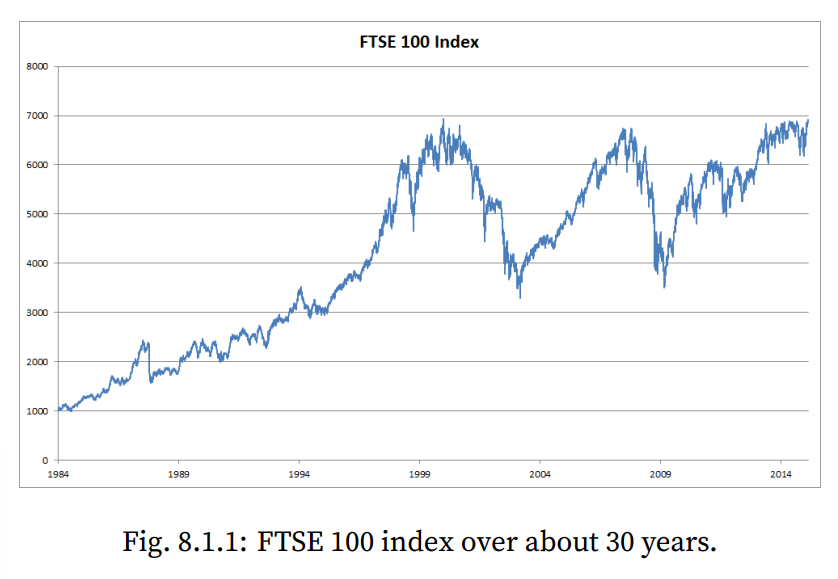

Let us denote the prices by $x_t$, i.e., at time step $t ∈ Z^+$ we observe price xt. Note that for sequences
in this text, *t* will typically be discrete and vary over integers or its subset. Suppose that a trader
who wants to do well in the stock market on day t predicts $x_t$ via
$$x_t ∼ P(x_t | x_{t−1}, . . . , x1). (8.1.1)$$

### Autoregressive Models
In order to achieve this, our trader could use a regression model such as the one that we trained in
Section 3.3. There is just one major problem: the number of inputs, $x_{t−1}, . . . , x_1$ varies, depending
on *t*. That is to say, the number increases with the amount of data that we encounter, and we
will need an approximation to make this computationally tractable. Much of what follows in this
chapter will revolve around how to estimate $P(x_t
| x_{t−1}, . . . , x_1)$ efficiently. In a nutshell it boils
down to two strategies as follows.
First, assume that the potentially rather long sequence $x_{t−1}, . . . , x_1$ is not really necessary. In
this case we might content ourselves with some timespan of length *τ* and only use $x_{t−1}, . . . , x_{t−τ}$
observations. The immediate benefit is that now the number of arguments is always the same, at
least for $t > τ$ . This allows us to train a deep network as indicated above. Such models will be
called autoregressive models, as they quite literally perform regression on themselves.
The second strategy, shown in Fig. 8.1.2, is to keep some summary ht of the past observations,
and at the same time update ht
in addition to the prediction $x^t$. This leads to models that estimate
$x_t$ with $x^t = P(x_t | h_t)$ and moreover updates of the form $h_t = g(h_{t−1}, x_{t−1})$. Since $h_t$
is never
observed, these models are also called latent autoregressive models.

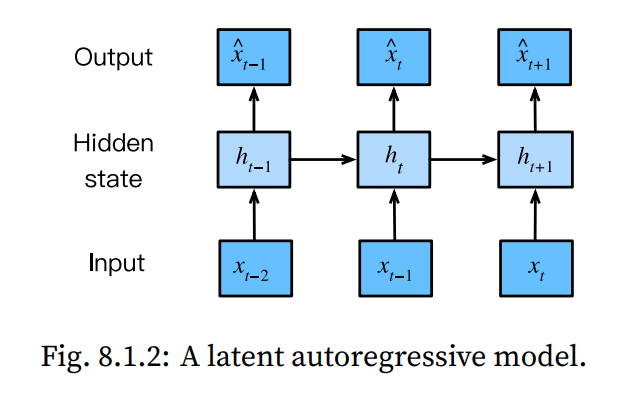

Both cases raise the obvious question of how to generate training data. One typically uses historical observations to predict the next observation given the ones up to right now. Obviously we do
not expect time to stand still. However, a common assumption is that while the specific values of
xt might change, at least the dynamics of the sequence itself will not. This is reasonable, since
novel dynamics are just that, novel and thus not predictable using data that we have so far. Statisticians call dynamics that do not change stationary. Regardless of what we do, we will thus get an
estimate of the entire sequence via
$$P(x_1, . . . , x_T ) = \prod_{t=1}^T P(x_t| x_{t−1}, . . . , x_1). (8.1.2)$$

Note that the above considerations still hold if we deal with discrete objects, such as words, rather
than continuous numbers. The only difference is that in such a situation we need to use a classifier
rather than a regression model to estimate $P(x_t
| x_{t−1}, . . . , x_1).$

### Markov Models
Recall the approximation that in an autoregressive model we use only $x_{t−1}, . . . , x_{t−τ}$ instead of
$x_{t−1}, . . . , x_1$ to estimate $x_t$
. Whenever this approximation is accurate we say that the sequence
satisfies a Markov condition. In particular, if $τ = 1$, we have a first-order Markov model and $P(x)$ is
given by
$$P(x_1, . . . , x_T ) = \prod_{t=1}^T P(x_t, ..., x_{t−1})$$
where 
$$P(x_1 | x_0) = P(x_1). (8.1.3)$$

Such models are particularly nice whenever xt assumes only a discrete value, since in this case
dynamic programming can be used to compute values along the chain exactly. For instance, we
can compute $P(x_{t+1} | x_{t−1})$ efficiently:

$$P(x_{t+1} | x_{t−1}) = ∑_{x_t}\frac{P(x_{t+1}, x_t, x_{t−1})}{P(x_{t−1})}$$
$$=∑_{x_t}\frac{P(x_{t+1} | x_t, x_{t−1})P(x_t, x_{t−1})}{P(x_{t−1})}$$
$$=\sum_{x_t} P(x_{t+1} | x_t)P(x_t| x_{t−1})(8.1.4)$$

by using the fact that we only need to take into account a very short history of past observations:
$P(x_{t+1} | x_t , x_{t−1}) = P(x_{t+1} | x_t)$. Going into details of dynamic programming is beyond the scope
of this section. Control and reinforcement learning algorithms use such tools extensively.


### Causality
In principle, there is nothing wrong with unfolding $P(x_1, . . . , x_T )$ in reverse order. After all, by
conditioning we can always write it via
$$P(x_1, . . . , x_T ) = \prod_{t=T}^1 P(x_t | x_{t+1}, . . . , x_T ). (8.1.5)$$

In fact, if we have a Markov model, we can obtain a reverse conditional probability distribution,
too. In many cases, however, there exists a natural direction for the data, namely going forward
in time. It is clear that future events cannot influence the past. Hence, if we change $x_t$
, we may be able to influence what happens for $x_{t+1}$ going forward but not the converse. That is, if we change
$x_t$, the distribution over past events will not change. Consequently, it ought to be easier to explain
$P(x_{t+1} | x_t)$ rather than $P(x_t | x_{t+1})$. For instance, it has been shown that in some cases we can
find $x_{t+1} = f(x_t)+ϵ$ for some additive noise $ϵ$, whereas the converse is not true (Hoyer et al., 2009).
This is great news, since it is typically the forward direction that we are interested in estimating.
The book by Peters et al. has explained more on this topic (Peters et al., 2017a). We are barely
scratching the surface of it.

## 8.1.2 Training
After reviewing so many statistical tools, let us try this out in practice. We begin by generating
some data. To keep things simple we generate our sequence data by using a sine function with
some additive noise for time steps $1, 2, . . . , 1000$.

In [2]:
use strict;
use warnings;
use Data::Dump qw(dump);
use AI::MXNet qw(mx);
use AI::MXNet::Gluon qw(gluon);
use List::Util qw(min max shuffle);
use d2l;
use d2l::Accumulator;
use d2l::Animator;

#%matplotlib inline
#from mxnet import autograd, gluon, init, np, npx
#from mxnet.gluon import nn
#from d2l import mxnet as d2l
#npx.set_np()

In [68]:
my $T = 1000; # Generate a total of 1000 points
my $time = mx->nd->arange(start=>1, stop=>($T + 1));
my $x = mx->nd->sin(0.01 * $time) + mx->nd->random->normal(0, 0.2, ($T,));

d2l->plot($time, [$x], 'time', 'x', xlim=>[1, 1000], figsize=>[6, 3])


Next, we need to turn such a sequence into features and labels that our model can train on. Based
on the embedding dimension $τ$ we map the data into pairs $y_t = x_t$ and $x_t = [x_{t−τ} , . . . , x_{t−1}]$. The
astute reader might have noticed that this gives us τ fewer data examples, since we do not have
sufficient history for the first $τ$ of them. A simple fix, in particular if the sequence is long, is to
discard those few terms. Alternatively we could pad the sequence with zeros. Here we only use
the first 600 feature-label pairs for training.

In [4]:
my $tau = 4;
my $features = mx->nd->zeros([$T - $tau, $tau]);

$features = $features->asarray;


for my $i (0..$tau-1){
    for my $j ($i..($T - $tau + $i)-1){
        $$features[$j-$i][$i] = $x->[$j]->asarray->[0];
    }
}
$features = mx->nd->array($features);
my $labels = $x->slice([$tau,$x->shape->[0]-1])->reshape([-1, 1]);

<AI::MXNet::NDArray 996x1 @cpu(0)>

In [38]:
sub load_array {
    my ($X, $y, $batch_size, $is_train) = @_;
    
    my $dataset = gluon->data->ArrayDataset(data=>$X, label=>$y);
    return gluon->data->DataLoader($dataset,$batch_size,shuffle=>$is_train);
}

Warning: Subroutine load_array redefined at reply input line 1.


In [39]:
my ($batch_size, $n_train) = (16, 600);
# Only the first `n_train` examples are used for training
my $train_iter = load_array($features, $labels, $batch_size, 1);
print dump $train_iter;

do {
  my $a = bless({
    batch_sampler => bless({
                       _prev      => [],
                       batch_size => 16,
                       last_batch => "keep",
                       sampler    => bless({
                                       _current => 0,
                                       _indices => [
                                                     912,
                                                     253,
                                                     373,
                                                     248,
                                                     687,
                                                     623,
                                                     674,
                                                     771,
                                                     830,
                                                     274,
                                                     533,
                               

1

Here we keep the architecture fairly simple: just an MLP with two fully-connected layers, ReLU
activation, and squared loss.

In [40]:
# A simple MLP
sub get_net{
    my $net = gluon->nn->Sequential();
    $net->name_scope(sub {
        $net->add(gluon->nn->Dense(units=>10, activation=>'relu', in_units=>4));
        $net->add(gluon->nn->Dense(units=>1, in_units=>10));
    });
    
    $net->initialize(mx->init->Xavier());
    return $net;
}
# Square loss
my $loss = gluon->loss->L2Loss();

L2Loss(batch_axis=0, w=1)

Warning: Subroutine get_net redefined at reply input line 2.


Now we are ready to train the model. The code below is essentially identical to the training loop
in previous sections, such as Section 3.3. Thus, we will not delve into much detail.

In [51]:
sub evaluate_loss{
    my ($net, $data_iter, $loss) = @_;
    #"""Evaluate the loss of a model on the given dataset."""
    my $metric = Accumulator->new(2); # Sum of losses, no. of examples
    while (defined(my $batch = <$data_iter>)){
        my $X = $batch->[0];
        my $y = $batch->[1]->astype('float32'); 
        
        my $l = $loss->($net->($X), $y);
        $metric->add([ $l->sum->asscalar, $l->size]);
    }
    if($metric->getitem(1)==0){
        return (0);
    }else{
        return ($metric->getitem(0) / $metric->getitem(1));
    }
}

Warning: Subroutine evaluate_loss redefined at reply input line 1.


In [78]:
sub train{
    my ($net, $train_iter, $loss, $epochs, $lr, $batch_size) = @_;
    my $trainer = gluon->Trainer($net->collect_params(), 'adam', { learning_rate=> $lr});
    for my $epoch (0..$epochs-1){  
        $trainer->step($batch_size, 1);
        my ($X, $y, $l);
        while(defined(my $batch = <$train_iter>)){
            # Compute gradients and update parameters
            $X = $batch->[0];
            $y = $batch->[1]->astype('float32'); 
            mx->autograd->record(sub {
                $l = $loss->($net->($X), $y);
            });
            $l->backward();
            $trainer->step($batch_size);

        }
        print("epoch " . ($epoch + 1) . " loss: " . evaluate_loss($net, $train_iter, $loss) . "\n");
    }
}
my $net = get_net();
train($net, $train_iter, $loss, 5, 0.01, $batch_size);

epoch 1 loss: 0.0374855595494968
epoch 2 loss: 0.0347295831814109
epoch 3 loss: 0.0306389866486551
epoch 4 loss: 0.0292182459783961
epoch 5 loss: 0.0292347932129679


Warning: Subroutine train redefined at reply input line 1.


## 8.1.3 Prediction
Since the training loss is small, we would expect our model to work well. Let us see what this
means in practice. The first thing to check is how well the model is able to predict what happens
just in the next time step, namely the one-step-ahead prediction.

In [71]:
my $onestep_preds = $net->($features);
#print dump $time->slice([$tau, -1])->asarray;
d2l->plot([$time->asarray, $time->slice([$tau, -1])->asarray],[$x->asarray, $onestep_preds->asarray], 'time', 'x',legend=>['data', '1-step preds'], xlim=>[1, 1000], figsize=>[6, 3], fmts => ['--', '--']);


The one-step-ahead predictions look nice, just as we expected. Even beyond 604 (n_train + tau)
observations the predictions still look trustworthy. However, there is just one little problem to this: if we observe sequence data only until time step 604, we cannot hope to receive the inputs
for all the future one-step-ahead predictions. Instead, we need to work our way forward one step
at a time:

$$\hat{x}_{605} = f(x_{601}, x_{602}, x_{603}, x_{604}),$$
$$\hat{x}_{606} = f(x_{602}, x_{603}, x_{604}, \hat{x}_{605}),$$
$$\hat{x}_{607} = f(x_{603}, x_{604}, \hat{x}_{605}, \hat{x}_{606}),$$
$$\hat{x}_{608} = f(x_{604}, \hat{x}_{605}, \hat{x}_{606}, \hat{x}_{607}),$$
$$\hat{x}_{609} = f(\hat{x}_{605}, \hat{x}_{606}, \hat{x}_{607}, \hat{x}_{608}),$$
$$. . .(8.1.6) $$
Generally, for an observed sequence up to $x_t$
, its predicted output $\hat{x}_{t+k}$ at time step $t + k$ is called
the k-step-ahead prediction. Since we have observed up to $x_{604}$, its k-step-ahead prediction is $\hat{x}_{604+k}$.
In other words, we will have 

In [99]:
my $multistep_preds = mx->nd->zeros([$T]);
$multistep_preds = $multistep_preds->asarray;
for my $i (0..($n_train + $tau - 1)){
    $$multistep_preds[$i] = $x->[$i]->asarray->[0];
}

In [100]:
for my $i ($n_train + $tau .. $T-1){
    $multistep_preds->[$i] = $net->(mx->nd->array($multistep_preds)->slice([$i - $tau, $i - 1])->reshape([1, -1]))->asarray->[0][0];
}
$multistep_preds = mx->nd->array($multistep_preds);

<AI::MXNet::NDArray 1000 @cpu(0)>

In [101]:
d2l->plot([$time, $time->slice([$tau, -1]), $time->slice([$n_train + $tau, -1])], [$x, $onestep_preds, $multistep_preds->slice([$n_train + $tau,-1])->asarray],'time', 'x', legend=>['data', '1-step preds', 'multistep preds'], xlim=>[1, 1000], figsize=>[6, 3], fmts => ['o', '-','--'])

As the above example shows, this is a spectacular failure. The predictions decay to a constant
pretty quickly after a few prediction steps. Why did the algorithm work so poorly? This is ultimately due to the fact that the errors build up. Let us say that after step 1 we have some error
$ϵ_1 = \bar{ϵ}$. Now the input for step 2 is perturbed by $ϵ_1$, hence we suffer some error in the order of
$ϵ_2 = \bar{ϵ} + cϵ_1$ for some constant $c$, and so on. The error can diverge rather rapidly from the true
observations. This is a common phenomenon. For instance, weather forecasts for the next 24
hours tend to be pretty accurate but beyond that the accuracy declines rapidly. We will discuss
methods for improving this throughout this chapter and beyond.

Let us take a closer look at the difficulties in k-step-ahead predictions by computing predictions
on the entire sequence for $k = 1, 4, 16, 64$.

In [102]:
my $max_steps = 64;

64

In [105]:
my $features = mx->nd->zeros([$T - $tau - $max_steps + 1, $tau + $max_steps]);
# Column `i` (`i` < `tau`) are observations from `x` for time steps from
# `i + 1` to `i + T - tau - max_steps + 1`
$features = $features->asarray;
for my $i (0..$tau-1){
    for my $j ($i..$i + $T - $tau - $max_steps){
        $$features[$j-$i][$i] = $x->[$j]->asarray->[0];
    }
}


In [ ]:
# Column `i` (`i` >= `tau`) are the (`i - tau + 1`)-step-ahead predictions for
# time steps from `i + 1` to `i + T - tau - max_steps + 1`

#$multistep_preds->[$i] = $net->(mx->nd->array($multistep_preds)->slice([$i - $tau, $i - 1])->reshape([1, -1]))->asarray->[0][0];


for my $i ($tau..$tau+$max_steps-1){
    my $arr = $net->(mx->nd->array(mx->nd->array($features)->slice([0,-1], [$i - $tau, $i -1])->asarray))->reshape([-1]);
    for my $j ($i..$i + $T - $tau - $max_steps){
        $$features[$j-$i][$i] =  $arr->[$j-$i]->asarray->[0];
    }
}

$features = mx->nd->array($features);

In [ ]:
my @steps = (1, 4, 16, 64);
my @arr1 = [];
my @arr2 = [];
my @arr3 = [];
for (@steps){
    push(@arr1, $time->slice([($tau + $_ - 1), ($T - $max_steps + $_ - 1)])->asarray);
    push(@arr2, $features->slice([0, -1], [($tau + $_ - 1), ($tau + $_ - 1 )])->asarray);
    push(@arr3,'{'.$_.'}-step preds');
}

my $arr1 = mx->nd->array(@arr1);
print dump $arr1;
#d2l->plot(@arr1, @arr2, 'time', 'x', legend=>@arr3, xlim=>[5, 1000], figsize=>[6, 3], fmts => ['o', '-','--', 'o'])


This clearly illustrates how the quality of the prediction changes as we try to predict further into
the future. While the 4-step-ahead predictions still look good, anything beyond that is almost
useless.

## Summary
* There is quite a difference in difficulty between interpolation and extrapolation. Consequently, if you have a sequence, always respect the temporal order of the data when training, i.e., never train on future data.
* Sequence models require specialized statistical tools for estimation. Two popular choices are autoregressive models and latent-variable autoregressive models.
* For causal models (e.g., time going forward), estimating the forward direction is typically a lot easier than the reverse direction.
* For an observed sequence up to time step t, its predicted output at time step $t + k$ is the k-step-ahead prediction. As we predict further in time by increasing $k$, the errors accumulate and the quality of the prediction degrades, often dramatically.